In [2]:
import pandas as pd
from prophet import Prophet
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'prophet'

In [15]:
df = pd.read_csv('data/imbalance_1h_2019.csv')
df

,timestamp,imbalance_price
0,2019-01-01 00:00:00,-329.604500
1,2019-01-01 01:00:00,-283.800000
2,2019-01-01 02:00:00,-334.717000
3,2019-01-01 03:00:00,117.666500
4,2019-01-01 04:00:00,-323.315000
...,...,...
20419,2021-04-30 19:00:00,-11.115500
20420,2021-04-30 20:00:00,293.269000
20421,2021-04-30 21:00:00,190.205000
20422,2021-04-30 22:00:00,147.016714


In [ ]:
df = df.rename(columns={'timestamp': 'ds', 'imbalance_price': 'y'})
df.head()

In [ ]:
def train_test_split(df):
    n = int(len(df)*0.7)
    train, test = df.iloc[:n], df.iloc[n:]

    return train,test

In [44]:
df_2019_train = df.query('timestamp < "2019-12-31 00:00:00"')

,timestamp,imbalance_price
0,2019-01-01 00:00:00,-329.6045
1,2019-01-01 01:00:00,-283.8000
2,2019-01-01 02:00:00,-334.7170
3,2019-01-01 03:00:00,117.6665
4,2019-01-01 04:00:00,-323.3150
...,...,...
8731,2019-12-30 19:00:00,105.3320
8732,2019-12-30 20:00:00,-76.2075
8733,2019-12-30 21:00:00,189.9445
8734,2019-12-30 22:00:00,59.0705


In [59]:
y_test = df.query('timestamp >= "2019-12-31 00:00:00" & timestamp < "2020-01-01 00:00:00"')
y_test = y_test.rename(columns={'timestamp': 'ds', 'imbalance_price': 'y'})
y_test.head()

,ds,y
8736,2019-12-31 00:00:00,-273.4715
8737,2019-12-31 01:00:00,-279.4340
8738,2019-12-31 02:00:00,-233.3825
8739,2019-12-31 03:00:00,-305.3545
8740,2019-12-31 04:00:00,396.2700


In [61]:
df_2019_train = df_2019.rename(columns={'timestamp': 'ds', 'imbalance_price': 'y'})
df_2019_train

,ds,y
0,2019-01-01 00:00:00,-329.6045
1,2019-01-01 01:00:00,-283.8000
2,2019-01-01 02:00:00,-334.7170
3,2019-01-01 03:00:00,117.6665
4,2019-01-01 04:00:00,-323.3150
...,...,...
8755,2019-12-31 19:00:00,-164.5285
8756,2019-12-31 20:00:00,-284.1885
8757,2019-12-31 21:00:00,-255.2655
8758,2019-12-31 22:00:00,924.7120


In [62]:
m = Prophet()
m.fit(df_2019_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -109.543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      59       12912.8   0.000181752       127.118   2.662e-06       0.001      117  LS failed, Hessian reset 
      99       12914.8    0.00548494       190.062      0.2715      0.5584      167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     150       12917.3    0.00116741       129.609   1.394e-05       0.001      272  LS failed, Hessian reset 
     199       12917.6   0.000510505       68.6047           1           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       12918.1   0.000190548       144.048   1.581e-06       0.001      405  LS failed, Hessian reset 
     299       12918.8   2.70661e-05       73.8556           1           1      512   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

     133.912   2.813e-06       0.001      570  LS failed, Hessian reset 
     360       12919.1   7.34711e-05       84.4415   1.032e-06       0.001      660  LS failed, Hessian reset 
     399       12919.1   0.000860324       76.9042           1           1      709   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     431       12919.3     0.0013885       222.821   1.621e-05       0.001      796  LS failed, Hessian reset 
     481       12919.5   2.76243e-06       60.8362   4.815e-08       0.001      922  LS failed, Hessian reset 
     499       12919.5   1.11244e-06        57.963      0.4398      0.4398      945   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     545       12919.5   2.83332e-06       61.0577           1           1     1019   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [75]:
# preparing extensible dataframe for next 24 time steps which is hours here
future = m.make_future_dataframe(periods=24)
future

,ds
0,2019-01-01 00:00:00
1,2019-01-01 01:00:00
2,2019-01-01 02:00:00
3,2019-01-01 03:00:00
4,2019-01-01 04:00:00
...,...
8779,2020-01-20 23:00:00
8780,2020-01-21 23:00:00
8781,2020-01-22 23:00:00
8782,2020-01-23 23:00:00


In [64]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8779,2020-01-20 23:00:00,-45.811349,-657.438468,510.119311
8780,2020-01-21 23:00:00,-73.160002,-702.639787,578.341426
8781,2020-01-22 23:00:00,-79.429465,-734.860441,505.229188
8782,2020-01-23 23:00:00,-56.114675,-673.853729,549.086402
8783,2020-01-24 23:00:00,-105.880906,-768.375617,582.731422


In [77]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          8784 non-null   datetime64[ns]
 1   trend                       8784 non-null   float64       
 2   yhat_lower                  8784 non-null   float64       
 3   yhat_upper                  8784 non-null   float64       
 4   trend_lower                 8784 non-null   float64       
 5   trend_upper                 8784 non-null   float64       
 6   additive_terms              8784 non-null   float64       
 7   additive_terms_lower        8784 non-null   float64       
 8   additive_terms_upper        8784 non-null   float64       
 9   daily                       8784 non-null   float64       
 10  daily_lower                 8784 non-null   float64       
 11  daily_upper                 8784 non-null   float64     

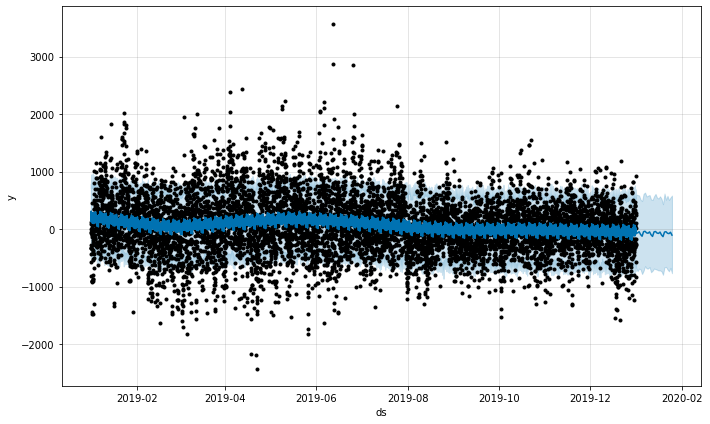

In [66]:
model_forecast_2019 = m.plot(forecast)

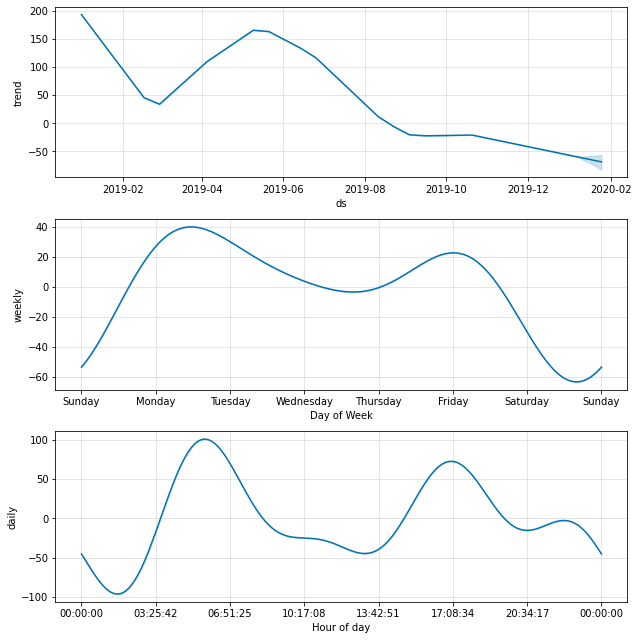

In [67]:
model_components_2019 = m.plot_components(forecast)

In [80]:
rmse = np.sqrt(mean_squared_error(y_test['y'], forecast['yhat'][:24]))
rmse

431.7983653268505

In [73]:
y_test.shape

(24, 2)

In [74]:
forecast['yhat'].shape

(8784,)

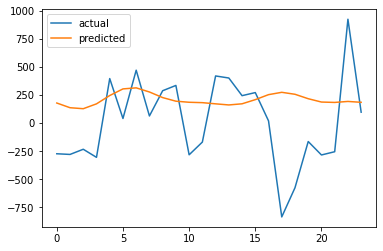

In [86]:
plt.plot(np.arange(24), y_test['y'], label='actual')
plt.plot(np.arange(24), forecast['yhat'][:24], label='predicted')
plt.legend()